In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import time
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
df = pd.read_csv("landmark2.csv")
X = df.drop(df.columns[0], axis = 1)
y = df[df.columns[0]]

ParserError: Error tokenizing data. C error: Expected 64 fields in line 2493, saw 127


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

len(y_train.unique())

#y_train=keras.utils.to_categorical(y_train,27)
#y_test=keras.utils.to_categorical(y_test)

33078    n
33076    n
33074    n
33077    n
Name: A, dtype: object

In [30]:
print("X_train shape" +  str(X_train.shape))
print("y_train shape" +  str(y_train.shape))
print("X_test shape" +  str(X_test.shape))
print("y_test shape" +  str(y_test.shape))

X_train shape(63740, 63)
y_train shape(63740,)
X_test shape(21247, 63)
y_test shape(21247,)


## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier()

reg = model.fit(X_train,y_train)
stop1 = time.time()

Y_pred = model.predict(X_test)
stop2 = time.time()
apprentissage_RFC = round(stop1-start,3)
prediction_RFC = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_RFC} s")
print(f"Temps d'apprentissage+prediction : {prediction_RFC} s")

Temps d'apprentissage : 52.045 s
Temps d'apprentissage+prediction : 52.765 s


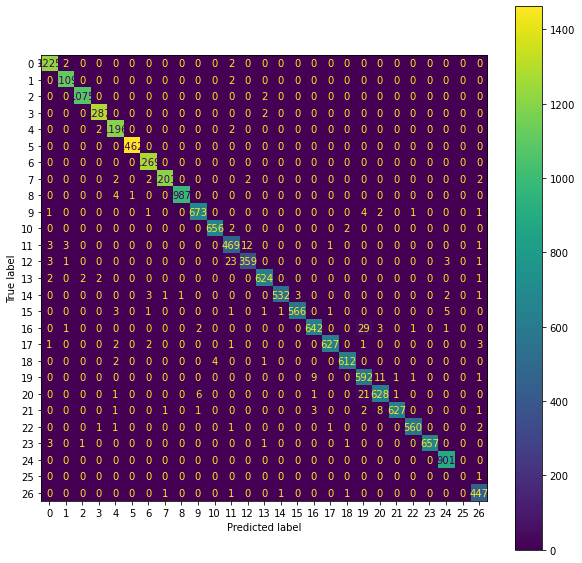

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.99      1.00      0.99      1229
           B       0.99      1.00      1.00      1111
           C       1.00      1.00      1.00      1077
           D       1.00      1.00      1.00      1289
           E       0.99      1.00      0.99      1200
           F       1.00      1.00      1.00      1462
           G       0.99      1.00      1.00      1269
           H       1.00      0.99      1.00      1209
           I       1.00      0.99      1.00       992
           K       0.99      0.99      0.99       683
           L       0.99      0.99      0.99       660
           M       0.93      0.96      0.94       489
           N       0.96      0.92      0.94       390
           O       0.99      0.99      0.99       631
           P       1.00      0.98      0.99       543
           Q       0.99      0.98      0.99       579
           R       0.98      0.95      0.96       679
           S       1.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ASL

In [52]:
from keras.layers import Conv2D,Flatten,MaxPool2D,BatchNormalization,Activation,Dropout
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [54]:
print("X_train shape" +  str(X_train.shape))
print("y_train shape" +  str(y_train.shape))
print("X_test shape" +  str(X_test.shape))
print("y_test shape" +  str(y_test.shape))

X_train shape(63740, 63)
y_train shape(63740,)
X_test shape(21247, 63)
y_test shape(21247,)


In [72]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=63, input_shape=[63]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=27, activation='softmax')
])

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 63)                4032      
                                                                 
 dropout_21 (Dropout)        (None, 63)                0         
                                                                 
 dense_21 (Dense)            (None, 128)               8192      
                                                                 
 dense_22 (Dense)            (None, 256)               33024     
                                                                 
 dense_23 (Dense)            (None, 512)               131584    
                                                                 
 dense_24 (Dense)            (None, 512)               262656    
                                                                 
 dropout_22 (Dropout)        (None, 512)              

In [73]:
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [74]:
y_train_encoded = pd.get_dummies(y_train, prefix='target')
y_test_encoded = pd.get_dummies(y_test, prefix='target')
y_train_encoded.head(3)

,target_A,target_B,target_C,target_D,target_E,target_F,target_G,target_H,target_I,target_K,...,target_S,target_T,target_U,target_V,target_W,target_X,target_Y,target_d,target_n,target_s
78280,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20208,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

In [77]:
history = model1.fit(
    X_train,
    y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=25,
    callbacks=[early_stop]
)

Epoch 1/25
1992/1992 [==============================] - 15s 7ms/step - loss: 0.1935 - accuracy: 0.9439 - val_loss: 0.0989 - val_accuracy: 0.9749
Epoch 2/25
1992/1992 [==============================] - 15s 8ms/step - loss: 0.1623 - accuracy: 0.9538 - val_loss: 0.0838 - val_accuracy: 0.9783
Epoch 3/25
1992/1992 [==============================] - 15s 8ms/step - loss: 0.1590 - accuracy: 0.9547 - val_loss: 0.0842 - val_accuracy: 0.9788
Epoch 4/25
1992/1992 [==============================] - 15s 8ms/step - loss: 0.1420 - accuracy: 0.9596 - val_loss: 0.1123 - val_accuracy: 0.9729
Epoch 5/25
1992/1992 [==============================] - 15s 8ms/step - loss: 0.1424 - accuracy: 0.9588 - val_loss: 0.0960 - val_accuracy: 0.9746
Epoch 6/25
1992/1992 [==============================] - 15s 8ms/step - loss: 0.1358 - accuracy: 0.9621 - val_loss: 0.0746 - val_accuracy: 0.9803
Epoch 7/25
1992/1992 [==============================] - 15s 8ms/step - loss: 0.1249 - accuracy: 0.9647 - val_loss: 0.0738 - val_ac

OSError: [WinError 1450] Ressources système insuffisantes pour terminer le service demandé: 'c:\\programdata\\anaconda3\\lib\\site-packages\\ipython\\terminal\\embed.py'